# Práctica KERAS en python con el dataset MNIST

## 1. Instalar KERAS

KERAS es una librería para la construcción de redes neuronales muy versátil y ampliamente utilizada por la comunidad de deep learning.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [9]:
import keras
from keras.utils import to_categorical
from keras import layers

In [10]:
from tensorflow.keras import regularizers

In [11]:
import tensorflow.keras as tk
from plot_keras_history import show_history, plot_history

In [12]:
from sklearn.metrics import roc_auc_score

## 2. Construccion de un modelo de KERAS

Hay dos maneras de construir un modelo en KERAS: el modelo secuencial y el modelo funcional [link](https://www.youtube.com/watch?v=Hj1-9Oi9ZjE). En el primer caso la red es una secuencia lineal de capas, mientras que el segundo caso permite una elaboración de redes con topologías más complejas (como por ejemplo redes cícliclas). Los pasos para construir una red son:

1- Diseñar la arquitectura de la red (ya sea mediante la manera secuencial o funcional).

2- Compilar el modelo (aqui se incluye la seleccion del algoritmo de aprendizaje y la funcion de coste a minimizar).

3- En este paso se introduce el dataset, la separación entre validacion y train, nº de epocas. En resumen se entrena la arquiterctura del paso 1 con el algoritmo seleccionado en el paso 2.

4- Utilizar el modelo para predecir.

### 2.1 El modelo secuencial

In [13]:
# model = keras.Sequential()
# model.add(layers.Dense(units = neuronas ocultas 1, input_dim = neuronas de entrada, activation = "sigmoid")) # Primera capa oculta
# model.add(layers.Dense(units = neuronas ocultas 2, activation = "sigmoid")) # Segunda capa oculta
# model.add(layers.Dense(units = neuronas de salida , activation = "sigmoid")) # capa de salida

### 2.2 El modelo funcional

In [14]:
# inputs = keras.Input(shape= neuronas de entrada) # neuronas capas de entrada
# x = inputs
# l1 = layers.Dense(neuronas ocultas 1, activation="sigmoid")(inputs)
# l2 = layers.Dense(neuronas ocultas 2, activation="sigmoid")(l1)
# outputs = layers.Dense(neuronas de salida, activation="sigmoid")(l2)
# model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

### 2.3 Compilar el modelo y entrenar

In [15]:
#model.compile(
#    loss="mse",
#    optimizer=keras.optimizers.Adam(learning_rate),
#    metrics=["accuracy"],
#)

# model = model.fit(x_train, y_train, batch_size=100, epochs=epochs, validation_split=0.1, callbacks = callbacks)

### 2.4 Predecir

In [16]:
# prediction = model.predict(xt) 

## 3. Construir una red neuronal para el dataset MNIST

### 3.1 Cargar el dataset MNIST

In [17]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

### 3.2 Preprocesar los datos 

In [18]:
# normalización, adecuar las matrices con las columnas apropiadas (por ejemplo, 784 en la entrada) ...


## matriz de salida (neuronas de salida)
y_train = to_categorical(y_train, 10)# 10 son el número de clases
y_test = to_categorical(y_test, 10)

## matriz de entrada (neuronas de entrada)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape(x_test.shape[0], 784)

## normalizar/escalar
x_train = x_train / 255
x_test = x_test / 255

#### 3.3.1 Construir una red con estructura 784-100-100-10 mediante el modelo secuencial y entrenar

In [19]:
model = keras.Sequential()
model.add(layers.Dense(units = 100, input_dim = 784, activation = "sigmoid")) # Primera capa oculta
model.add(layers.Dense(units = 100, activation = "sigmoid")) # Segunda capa oculta
model.add(layers.Dense(units = 10 , activation = "sigmoid")) # capa de salida

model.compile(
  optimizer = keras.optimizers.SGD(0.1),
  loss = "mse",
  metrics = ["accuracy"]
)

history = model.fit(x_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.1171 - loss: 0.1027
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.1212 - loss: 0.0898
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.1448 - loss: 0.0896
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.1664 - loss: 0.0894
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.2339 - loss: 0.0892
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.2460 - loss: 0.0890
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.2956 - loss: 0.0888
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.3206 - loss: 0.0885
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.3529 - loss: 0.0882
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.3657 - loss: 0.0879
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.3310 - loss: 0.0875
Epoch 12/100
600/60

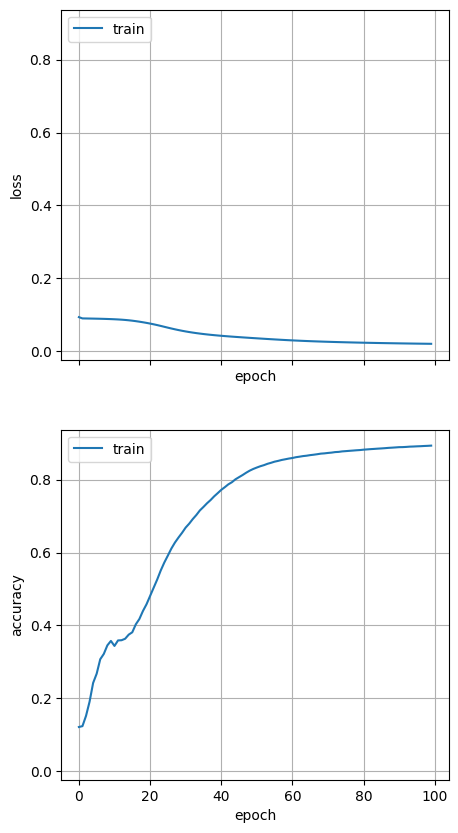

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history.history['loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')
ax1.grid(True)

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
ax2.grid(True)

### 3.4 Predecir en el conjunto de test y validar para el modelo funcional

In [21]:
# Predice aquí
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


In [22]:
pred_pd = pd.DataFrame(pred)
y_test_pd = pd.DataFrame(y_test)
pred_pd

,0,1,2,3,4,5,6,7,8,9
0,0.024796,0.001030,0.008925,0.047748,0.001046,0.001653,0.000019,0.978945,0.000813,0.026030
1,0.071598,0.003987,0.691709,0.046554,0.000132,0.012091,0.132619,0.000073,0.080734,0.000054
2,0.000048,0.915846,0.024246,0.020181,0.002136,0.005478,0.014675,0.035944,0.010044,0.007865
3,0.963196,0.000038,0.015474,0.001747,0.000086,0.027201,0.010410,0.027112,0.003359,0.000240
4,0.000764,0.000951,0.013448,0.000310,0.784802,0.003439,0.014269,0.019572,0.017687,0.092610
...,...,...,...,...,...,...,...,...,...,...
9995,0.012456,0.005582,0.981538,0.068989,0.000124,0.000226,0.004075,0.003892,0.041888,0.000157
9996,0.011477,0.013701,0.069666,0.973594,0.000013,0.017375,0.000054,0.040813,0.005154,0.000781
9997,0.000127,0.002852,0.000897,0.001892,0.849622,0.045735,0.004525,0.009636,0.093302,0.340350
9998,0.007816,0.006190,0.002137,0.005255,0.053116,0.312919,0.030127,0.000489,0.282887,0.002210


In [23]:
y_test_pd

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Ahora valida calculando el AUC por dígito y el accuracy tal y como visteis en la práctica de KNN

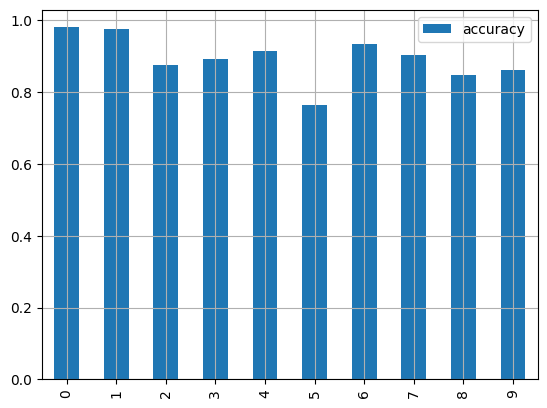

In [24]:
y_test_num = np.argmax(y_test, axis = 1)
pred_num = np.argmax(pred, axis = 1)

# Accuracy
acc = []
for digit in np.arange(10):
    posi_digit = np.where(y_test_num == digit)
    y_true = y_test_num[posi_digit]
    y_pred = pred_num[posi_digit]
    
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total_predictions = len(y_true)
    acc.append(correct_predictions / total_predictions)

accuracy = pd.DataFrame(acc, index=np.arange(10), columns=['accuracy'])

accuracy.plot.bar()
plt.grid(True)

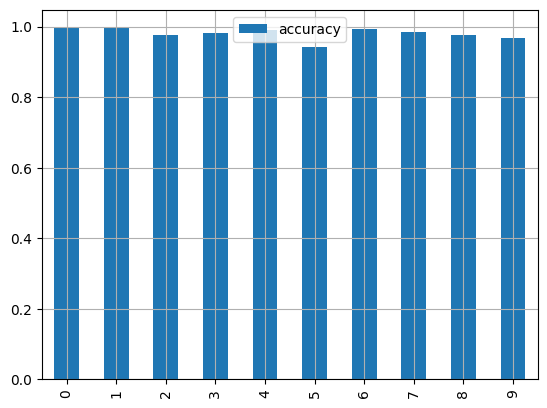

In [25]:
# AUC
auc = []
for digit in np.arange(10):
    auc.append(roc_auc_score(y_test[:,digit], pred[:,digit]))
auc = pd.DataFrame(auc, index=np.arange(10), columns=['accuracy'])

auc.plot.bar()
plt.grid(True)

### 3.5 Reponde a las siguientes preguntas

1 - ¿Para qué número obtengo el AUC más alto? ¿y para cuál el más bajo?

El AUC más alto lo obtengo para el 0 y el más bajo para el 5

2 - Construir una red con estructura 784-50-25-50-10, ¿qué es lo que sucede en el entrenamiento?¿por qué no funciona bien?

In [26]:
model = keras.Sequential()
model.add(layers.Dense(units = 50, input_dim = 784, activation = "sigmoid")) # Primera capa oculta
model.add(layers.Dense(units = 25, activation = "sigmoid")) # Segunda capa oculta
model.add(layers.Dense(units = 50, activation = "sigmoid")) # Segunda capa oculta
model.add(layers.Dense(units = 10 , activation = "sigmoid")) # capa de salida

model.compile(
  optimizer = keras.optimizers.SGD(0.1),
  loss = "mse",
  metrics = ["accuracy"]
)

history = model.fit(x_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
  1/600 ━━━━━━━━━━━━━━━━━━━━ 1:05 109ms/step - accuracy: 0.0900 - loss: 0.2836

/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.0933 - loss: 0.1264
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.1130 - loss: 0.0900
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.1118 - loss: 0.0900
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.1136 - loss: 0.0900
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.1112 - loss: 0.0900
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.1134 - loss: 0.0899
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.1104 - loss: 0.0899
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.1124 - loss: 0.0899
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.1139 - loss: 0.0899
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.1127 - loss: 0.0899
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.1120 - loss: 0.0899
Epoch 12/100
600/600 ━━━━━━━━━━

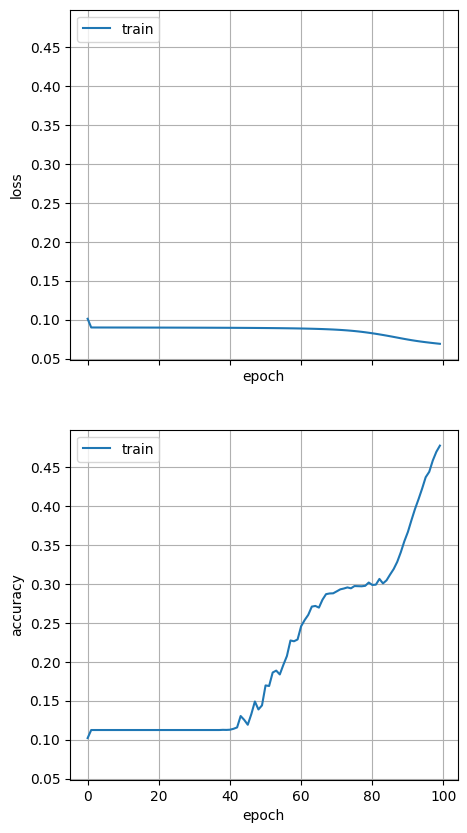

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history.history['loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')
ax1.grid(True)

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
ax2.grid(True)

3- ¿Crees que para problemas de clasificación es apropiado minimizar el mean squared error? Construye una red minimizando el categorical cross-entropy, tal que en compile(loss = "categorical_crossentropy") y vuelve a calcular los índices de validación...¿ves alguna diferencia con respecto a cuando se entrenó minimizando el "mse"?

In [38]:
model = keras.Sequential()
model.add(layers.Dense(units = 50, input_dim = 784, activation = "sigmoid")) # Primera capa oculta
model.add(layers.Dense(units = 25, activation = "sigmoid")) # Segunda capa oculta
model.add(layers.Dense(units = 50, activation = "sigmoid")) # Segunda capa oculta
model.add(layers.Dense(units = 10 , activation = "sigmoid")) # capa de salida

model.compile(
  optimizer = keras.optimizers.SGD(0.1),
  loss = "categorical_crossentropy",
  metrics = ["accuracy"]
)

history = model.fit(x_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.1151 - loss: 2.3040
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.2634 - loss: 2.2053
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5176 - loss: 1.5335
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7287 - loss: 0.9153
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.8005 - loss: 0.7055
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8469 - loss: 0.5804
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8756 - loss: 0.4735
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8931 - loss: 0.4087
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.9031 - loss: 0.3588
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.9131 - loss: 0.3194
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9223 - loss: 0.2917
Epoch 12/100
600/60

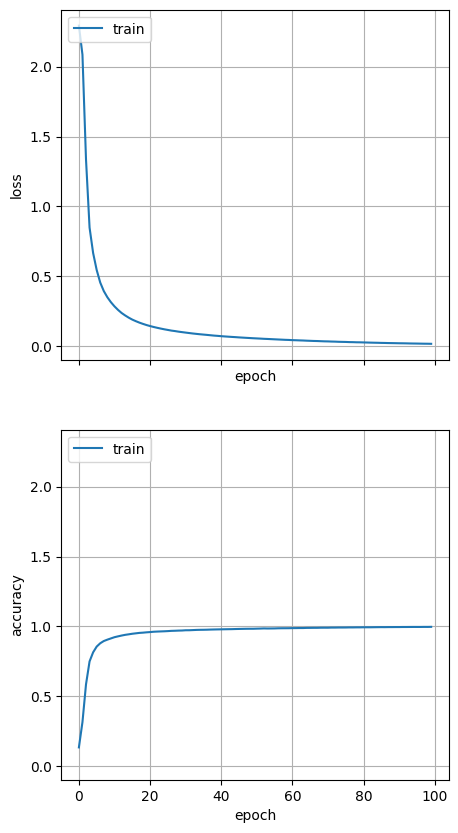

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history.history['loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')
ax1.grid(True)

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
ax2.grid(True)

In [41]:
# Predice aquí
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


In [42]:
pred_pd = pd.DataFrame(pred)
y_test_pd = pd.DataFrame(y_test)

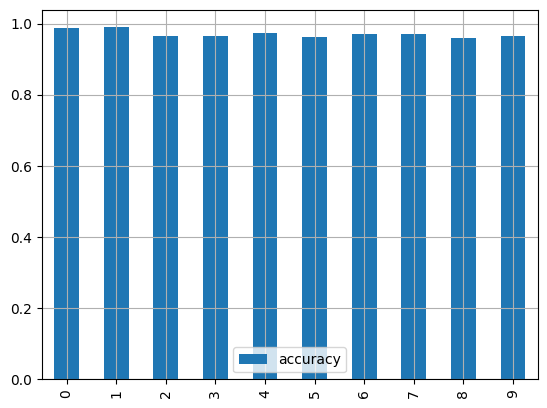

In [43]:
y_test_num = np.argmax(y_test, axis = 1)
pred_num = np.argmax(pred, axis = 1)

# Accuracy
acc = []
for digit in np.arange(10):
    posi_digit = np.where(y_test_num == digit)
    y_true = y_test_num[posi_digit]
    y_pred = pred_num[posi_digit]
    
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total_predictions = len(y_true)
    acc.append(correct_predictions / total_predictions)

accuracy = pd.DataFrame(acc, index=np.arange(10), columns=['accuracy'])

accuracy.plot.bar()
plt.grid(True)

### 3.6 Early-Stopping y como guardar el modelo

En las redes neuronales hay muchos parámetros y por tanto en muchas ocasiones es necesario adoptar medidas de regularización como el early-stopping. El early-stopping consiste en parar el entrenamiendo cuando se cumpla un criterio como los siguientes:

    1- Que la diferencia del error entre el dataset de train y el dataset de validación no supere un mínimo
    
    2- Cuando el error de validación deje de disminuir.

La manera de implementarlo en KERAS es a través de los callbacks. Los callbacks se refieren a funciones que solo aplican durante el entrenamiento (por ejemplo, el early-stopping solo tiene sentido mientras el modelo entrena, cuando ya está entrenado no hay nada que parar). El registro completo de callbacks definidos en KERAS puede verse en el siguiente link: https://keras.io/callbacks/  . En esta clase vamos a ver dos funciones pertenecientes a los callbacks: el callback del early-stopping y el callback de guardar el modelo en cada época.

#### 3.6.1 Callback del early-stopping

In [45]:
patience = 20

my_callbacks = [keras.callbacks.EarlyStopping(patience=patience),
                 keras.callbacks.ModelCheckpoint(filepath='filename.h5')]
        
model = keras.Sequential()
model.add(layers.Dense(units = 100, input_dim = 784, activation = "sigmoid")) # Primera capa oculta
model.add(layers.Dense(units = 100, activation = "sigmoid")) # Segunda capa oculta
model.add(layers.Dense(units = 10 , activation = "sigmoid")) # capa de salida
                     
model.compile(
 optimizer = keras.optimizers.SGD(0.1),
 loss = "categorical_crossentropy",
 metrics = ["accuracy"]
)

history = model.fit(x_train, y_train, epochs = 100, batch_size = 100, callbacks=my_callbacks)

Epoch 1/100


/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


543/600 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.3194 - loss: 2.1043

/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.3389 - loss: 2.0662
Epoch 2/100
556/600 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.8188 - loss: 0.7305

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8203 - loss: 0.7230
Epoch 3/100
583/600 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8790 - loss: 0.4490

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8792 - loss: 0.4482
Epoch 4/100
545/600 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8956 - loss: 0.3697

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8959 - loss: 0.3686
Epoch 5/100
555/600 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9072 - loss: 0.3230

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9073 - loss: 0.3229
Epoch 6/100
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9121 - loss: 0.3020

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9121 - loss: 0.3020
Epoch 7/100
549/600 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9169 - loss: 0.2826

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9171 - loss: 0.2822
Epoch 8/100
545/600 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9231 - loss: 0.2674

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9231 - loss: 0.2670
Epoch 9/100
560/600 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9268 - loss: 0.2514

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9269 - loss: 0.2513
Epoch 10/100
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9315 - loss: 0.2388

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9315 - loss: 0.2388
Epoch 11/100
550/600 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9344 - loss: 0.2241

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9344 - loss: 0.2241
Epoch 12/100
527/600 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9379 - loss: 0.2129

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9379 - loss: 0.2131
Epoch 13/100
536/600 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9382 - loss: 0.2095

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9385 - loss: 0.2089
Epoch 14/100
520/600 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9431 - loss: 0.1967

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9432 - loss: 0.1965
Epoch 15/100
563/600 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9460 - loss: 0.1879

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9460 - loss: 0.1878
Epoch 16/100
549/600 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9486 - loss: 0.1794

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9486 - loss: 0.1792
Epoch 17/100
548/600 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9507 - loss: 0.1719

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9507 - loss: 0.1718
Epoch 18/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9520 - loss: 0.1642

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9520 - loss: 0.1642
Epoch 19/100
531/600 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9548 - loss: 0.1523

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9548 - loss: 0.1528
Epoch 20/100
519/600 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9560 - loss: 0.1496

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9560 - loss: 0.1498
Epoch 21/100
580/600 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9565 - loss: 0.1478

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.9565 - loss: 0.1477
Epoch 22/100
534/600 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9614 - loss: 0.1383

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9612 - loss: 0.1384
Epoch 23/100
548/600 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9598 - loss: 0.1375

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9599 - loss: 0.1373
Epoch 24/100
540/600 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9625 - loss: 0.1298

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9624 - loss: 0.1298
Epoch 25/100
568/600 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.9631 - loss: 0.1274

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9631 - loss: 0.1274
Epoch 26/100
533/600 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9662 - loss: 0.1221

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.9661 - loss: 0.1222
Epoch 27/100
530/600 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9671 - loss: 0.1165

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9669 - loss: 0.1166
Epoch 28/100
527/600 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9670 - loss: 0.1143

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9670 - loss: 0.1143
Epoch 29/100
553/600 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.9673 - loss: 0.1118

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9674 - loss: 0.1118
Epoch 30/100
580/600 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9689 - loss: 0.1075

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9689 - loss: 0.1075
Epoch 31/100
530/600 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9697 - loss: 0.1069

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9697 - loss: 0.1066
Epoch 32/100
574/600 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9706 - loss: 0.1011

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9706 - loss: 0.1011
Epoch 33/100
540/600 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9720 - loss: 0.0978

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9719 - loss: 0.0979
Epoch 34/100
536/600 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9723 - loss: 0.0968

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9723 - loss: 0.0968
Epoch 35/100
577/600 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9731 - loss: 0.0949

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9731 - loss: 0.0948
Epoch 36/100
539/600 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9749 - loss: 0.0886

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9749 - loss: 0.0888
Epoch 37/100
543/600 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9748 - loss: 0.0884

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9747 - loss: 0.0885
Epoch 38/100
557/600 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9747 - loss: 0.0877

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9748 - loss: 0.0876
Epoch 39/100
534/600 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.9752 - loss: 0.0882

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9753 - loss: 0.0878
Epoch 40/100
580/600 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9751 - loss: 0.0859

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9752 - loss: 0.0857
Epoch 41/100
545/600 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9775 - loss: 0.0796

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9775 - loss: 0.0797
Epoch 42/100
538/600 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9787 - loss: 0.0778

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9786 - loss: 0.0778
Epoch 43/100
543/600 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9780 - loss: 0.0780

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9781 - loss: 0.0779
Epoch 44/100
597/600 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9784 - loss: 0.0771

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9784 - loss: 0.0771
Epoch 45/100
527/600 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9780 - loss: 0.0750

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9782 - loss: 0.0748
Epoch 46/100
542/600 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9799 - loss: 0.0723

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9799 - loss: 0.0722
Epoch 47/100
539/600 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9797 - loss: 0.0715

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9797 - loss: 0.0713
Epoch 48/100
589/600 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9805 - loss: 0.0690

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9805 - loss: 0.0690
Epoch 49/100
546/600 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9805 - loss: 0.0671

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9806 - loss: 0.0671
Epoch 50/100
538/600 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9817 - loss: 0.0666

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9817 - loss: 0.0665
Epoch 51/100
549/600 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9825 - loss: 0.0623

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9825 - loss: 0.0624
Epoch 52/100
590/600 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9832 - loss: 0.0620

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9832 - loss: 0.0620
Epoch 53/100
564/600 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9825 - loss: 0.0622

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9825 - loss: 0.0621
Epoch 54/100
548/600 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9838 - loss: 0.0586

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9838 - loss: 0.0586
Epoch 55/100
547/600 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9832 - loss: 0.0589

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9833 - loss: 0.0588
Epoch 56/100
578/600 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9849 - loss: 0.0553

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9849 - loss: 0.0553
Epoch 57/100
556/600 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9838 - loss: 0.0569

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9839 - loss: 0.0567
Epoch 58/100
542/600 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9850 - loss: 0.0536

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9850 - loss: 0.0537
Epoch 59/100
525/600 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9863 - loss: 0.0523

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9861 - loss: 0.0524
Epoch 60/100
583/600 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9855 - loss: 0.0531

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.9855 - loss: 0.0531
Epoch 61/100
536/600 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9855 - loss: 0.0507

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9855 - loss: 0.0507
Epoch 62/100
512/600 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9861 - loss: 0.0511

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9862 - loss: 0.0509
Epoch 63/100
581/600 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9878 - loss: 0.0477

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.9878 - loss: 0.0478
Epoch 64/100
549/600 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9875 - loss: 0.0463

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9875 - loss: 0.0464
Epoch 65/100
538/600 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9876 - loss: 0.0486

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9876 - loss: 0.0484
Epoch 66/100
543/600 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9891 - loss: 0.0430

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9891 - loss: 0.0432
Epoch 67/100
564/600 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9881 - loss: 0.0453

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9881 - loss: 0.0453
Epoch 68/100
537/600 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9893 - loss: 0.0427

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9892 - loss: 0.0429
Epoch 69/100
525/600 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9891 - loss: 0.0422

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9891 - loss: 0.0423
Epoch 70/100
518/600 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.9899 - loss: 0.0393

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9898 - loss: 0.0396
Epoch 71/100
559/600 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9892 - loss: 0.0410

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9892 - loss: 0.0410
Epoch 72/100
520/600 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9901 - loss: 0.0397

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9901 - loss: 0.0398
Epoch 73/100
517/600 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9911 - loss: 0.0368

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9909 - loss: 0.0372
Epoch 74/100
516/600 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9901 - loss: 0.0399

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9902 - loss: 0.0397
Epoch 75/100
571/600 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9909 - loss: 0.0373

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9909 - loss: 0.0373
Epoch 76/100
586/600 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9907 - loss: 0.0367

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9907 - loss: 0.0367
Epoch 77/100
513/600 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9912 - loss: 0.0360

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9912 - loss: 0.0361
Epoch 78/100
541/600 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9915 - loss: 0.0350

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9915 - loss: 0.0351
Epoch 79/100
587/600 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9923 - loss: 0.0330

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9923 - loss: 0.0331
Epoch 80/100
546/600 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9919 - loss: 0.0342

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9920 - loss: 0.0342
Epoch 81/100
542/600 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9928 - loss: 0.0326

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9927 - loss: 0.0327
Epoch 82/100
542/600 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9926 - loss: 0.0324

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9926 - loss: 0.0324
Epoch 83/100
512/600 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9921 - loss: 0.0330

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9922 - loss: 0.0328
Epoch 84/100
539/600 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9926 - loss: 0.0326

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9926 - loss: 0.0325
Epoch 85/100
527/600 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9936 - loss: 0.0304

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9936 - loss: 0.0305
Epoch 86/100
541/600 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9943 - loss: 0.0279

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9942 - loss: 0.0281
Epoch 87/100
513/600 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9939 - loss: 0.0290

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9939 - loss: 0.0291
Epoch 88/100
544/600 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9938 - loss: 0.0274

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9938 - loss: 0.0276
Epoch 89/100
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9942 - loss: 0.0286

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9942 - loss: 0.0286
Epoch 90/100
515/600 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9945 - loss: 0.0272

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9945 - loss: 0.0272
Epoch 91/100
590/600 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9937 - loss: 0.0281

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9937 - loss: 0.0281
Epoch 92/100
516/600 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9944 - loss: 0.0270

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9944 - loss: 0.0270
Epoch 93/100
589/600 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9949 - loss: 0.0258

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9949 - loss: 0.0258
Epoch 94/100
562/600 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9944 - loss: 0.0256

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9944 - loss: 0.0256
Epoch 95/100
547/600 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.9953 - loss: 0.0247

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9952 - loss: 0.0247
Epoch 96/100
581/600 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9947 - loss: 0.0256

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9947 - loss: 0.0256
Epoch 97/100
577/600 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9955 - loss: 0.0233

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9955 - loss: 0.0234
Epoch 98/100
544/600 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9953 - loss: 0.0238

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9954 - loss: 0.0237
Epoch 99/100
572/600 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9950 - loss: 0.0240

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9950 - loss: 0.0240
Epoch 100/100
546/600 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9959 - loss: 0.0223

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9959 - loss: 0.0223


#### 3.6.2 Cargar el modelo

In [46]:
model = keras.models.load_model('filename.h5')

#### 3.6.3 Guardar únicamente el mejor modelo de acuerdo al criterio del early-stopping... y cargarlo

In [48]:
my_callbacks = [keras.callbacks.EarlyStopping(patience = 20),
               keras.callbacks.ModelCheckpoint(filepath='filename.h5', 
               save_best_only = True)]

#### 3.6.4 Responde a las siguientes preguntas

Entrena el mismo modelo con y sin early-stopping (sin early-stopping quiere decir que entreneis 500 épocas, por ejemplo). Cargalo y calcula el AUC.

    1- ¿qué modelo obtiene un AUC mayor para todos los números, el del early-stopping o el que no, en el dataset de TRAIN?
    
    2- ¿qué modelo obtiene un AUC mayor para todos los números, el del early-stopping o el que no, en el dataset de TEST?

In [49]:
model = keras.Sequential()
model.add(layers.Dense(units = 100, input_dim = 784, activation = "sigmoid")) # Primera capa oculta
model.add(layers.Dense(units = 100, activation = "sigmoid")) # Segunda capa oculta
model.add(layers.Dense(units = 10 , activation = "sigmoid")) # capa de salida

model.compile(
    optimizer = keras.optimizers.SGD(0.1),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
    )

history = model.fit(x_train, y_train, epochs = 100, batch_size = 100, callbacks=my_callbacks)

Epoch 1/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.3530 - loss: 2.0520
Epoch 2/500
255/600 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8156 - loss: 0.7472

/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.8298 - loss: 0.6838
Epoch 3/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8832 - loss: 0.4354
Epoch 4/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9004 - loss: 0.3626
Epoch 5/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9072 - loss: 0.3246
Epoch 6/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9131 - loss: 0.3043
Epoch 7/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9198 - loss: 0.2804
Epoch 8/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9230 - loss: 0.2646
Epoch 9/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9283 - loss: 0.2518
Epoch 10/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9323 - loss: 0.2370
Epoch 11/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9360 - loss: 0.2202
Epoch 12/500
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9380 - loss: 0.2158
Epoch 13/500
600/600 ━━━━━━━━━

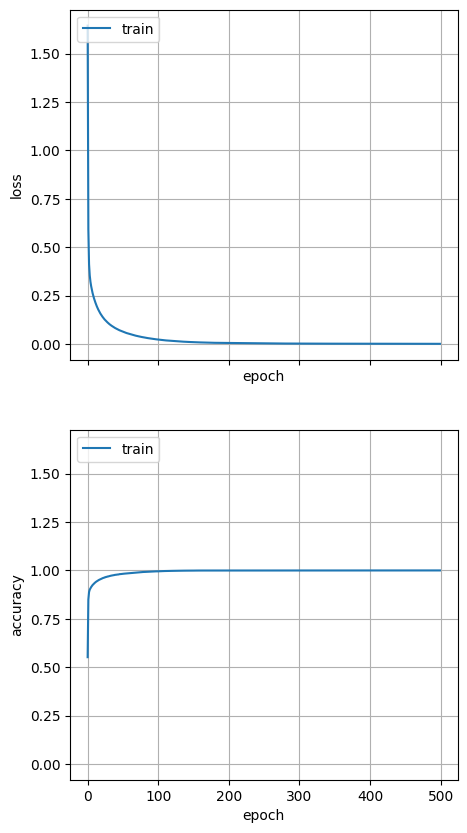

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history.history['loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')
ax1.grid(True)

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
ax2.grid(True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


<Axes: >

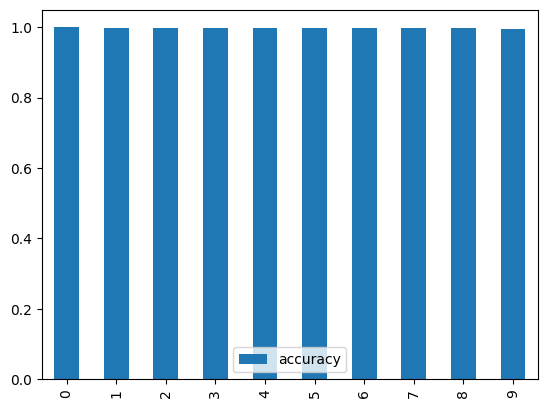

In [50]:
model = keras.models.load_model('filename.h5')

pred = model.predict(x_test)

auc = []
for digit in np.arange(10):
    auc.append(roc_auc_score(y_test[:,digit], pred[:,digit]))
auc = pd.DataFrame(auc, index=np.arange(10), columns=['accuracy'])

auc.plot.bar()

## 4. Diseña una arquitectura original para los datos Fashion-MNIST


In [52]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train_ori, y_train_ori), (x_test_ori, y_test_ori) = fashion_mnist.load_data()

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

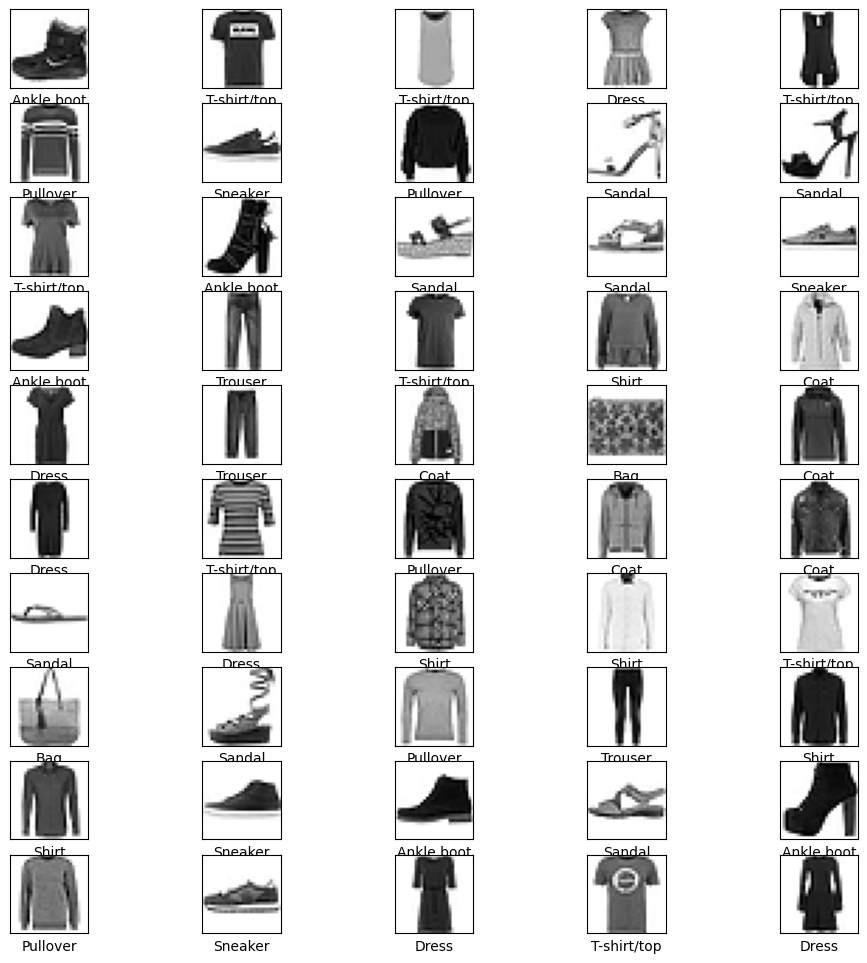

In [54]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_ori[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_ori[i]])
plt.show()

In [57]:
# IMPLEMENTAR LA RED AQUÍ

model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_train_ori, y_train_ori, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.6670 - loss: 9.1589
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.7539 - loss: 0.7224
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.8109 - loss: 0.5674
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.8201 - loss: 0.5331
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.8309 - loss: 0.5011
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.8334 - loss: 0.4883
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.8341 - loss: 0.4849
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.8420 - loss: 0.4703
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.8408 - loss: 0.4666
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.8436 - loss: 0.4630
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.8465 - loss: 0.45

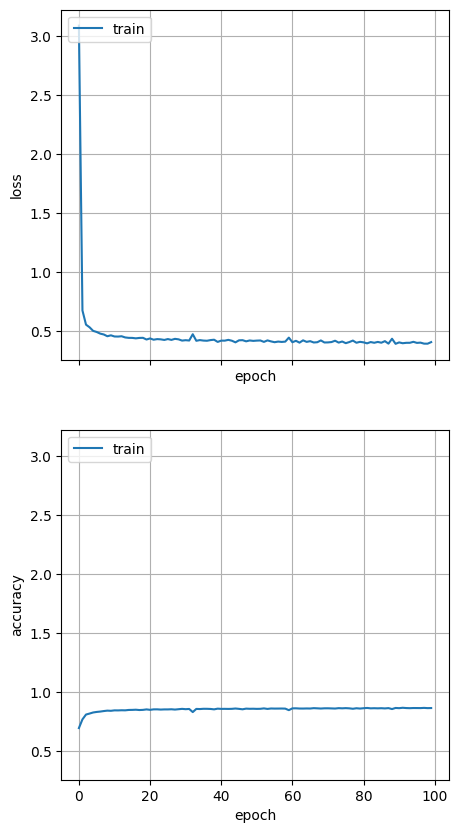

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history.history['loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')
ax1.grid(True)

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
ax2.grid(True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step


<Axes: >

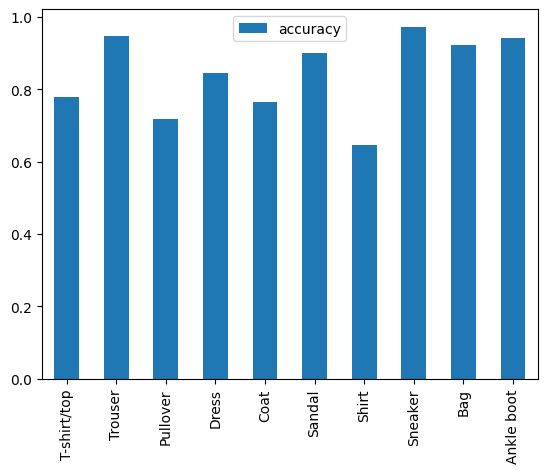

In [65]:
pred = model.predict(x_test_ori)

y_test_num = y_test_ori
pred_num = np.argmax(pred, axis = 1)

# Accuracy
acc = []

for cloth in np.arange(10):
    posi_cloth = np.where(y_test_num == cloth)
    y_true = y_test_num[posi_cloth]
    y_pred = pred_num[posi_cloth]
    
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total_predictions = len(y_true)
    acc.append(correct_predictions / total_predictions)

accuracy = pd.DataFrame(acc, index=class_names, columns=['accuracy'])

accuracy.plot.bar()